In [7]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'urecamain:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F685533%2F1202495%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240331%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240331T094739Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1950b257d7db3e5ba7f18f6cfc32600b2fbd7374725bb70456070193ad2f5aece3c95dcf0b7aa46911e9552e40dff151d259b0ae484c3c47921d5e52544bac0293a85e85cc6436dc076f43b27460550821865b235b3bfa04567def1a4c4333da02f1270a7fe74fb2c4ce962175eb9500f5a2c7a0c00f26872d037fd97ebf579261891d1f4ea2392ee7ca69aab478182a1346a3337b29110fb2bd71c8b0f959922206e3462050bcc74179bd3c313bba29dd7140351a99f482d7a5811b2d624a0841226e8b3fbb90d85f34b871b54daa2cde6eec0fb6ca74a0654bb8accaabe77875aa78c522721a6b5687294bf8b2d7351de1eb9faf8424bc77b2205672f7da67'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 101454621 bytes downloaded
Downloaded and uncompressed: urecamain
Data source import complete.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import os

In [ ]:
img = image.load_img(r'../input/urecamain/Train/Fire/SynDay1221.jpg')

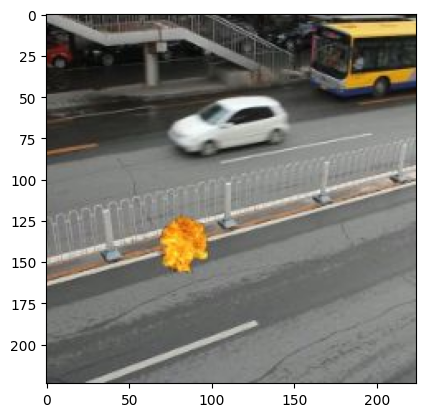

In [10]:
plt.imshow(img)

In [11]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [12]:
train_dataset = train.flow_from_directory(r'../input/urecamain/Train',target_size=(50,50),batch_size=3,class_mode='binary')

validation_dataset = validation.flow_from_directory(r'../input/urecamain/Vali',target_size=(50,50),batch_size=3,class_mode='binary')

Found 6003 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
input_shape = (50, 50, 3)

model = tf.keras.models.Sequential([

        tf.keras.layers.Conv2D(filters = 64,
                                kernel_size = 3,
                                activation='relu',
                                input_shape=input_shape),
        tf.keras.layers.MaxPool2D(2),

        tf.keras.layers.Conv2D(filters= 64,
                                kernel_size = 3,
                                activation='relu'),
        tf.keras.layers.MaxPool2D(2),

        tf.keras.layers.Conv2D(filters= 64,
                                kernel_size = 3,
                                activation='relu'),
        tf.keras.layers.MaxPool2D(2),

        tf.keras.layers.Conv2D(filters= 64,
                                kernel_size = 3,
                                activation='relu'),
        tf.keras.layers.MaxPool2D(2),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(1,activation='sigmoid')
        ])

In [14]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,epochs=18 ,validation_data=validation_dataset)

Epoch 1/18
2001/2001 [==============================] - 52s 25ms/step - loss: 0.5048 - accuracy: 0.7623 - val_loss: 0.3595 - val_accuracy: 0.8485
Epoch 2/18
2001/2001 [==============================] - 49s 24ms/step - loss: 0.3421 - accuracy: 0.8589 - val_loss: 0.3282 - val_accuracy: 0.8470
Epoch 3/18
2001/2001 [==============================] - 52s 26ms/step - loss: 0.2805 - accuracy: 0.8886 - val_loss: 0.3444 - val_accuracy: 0.8710
Epoch 4/18
2001/2001 [==============================] - 49s 24ms/step - loss: 0.2460 - accuracy: 0.9012 - val_loss: 0.2718 - val_accuracy: 0.8905
Epoch 5/18
2001/2001 [==============================] - 49s 24ms/step - loss: 0.2088 - accuracy: 0.9184 - val_loss: 0.2841 - val_accuracy: 0.9010
Epoch 6/18
2001/2001 [==============================] - 54s 27ms/step - loss: 0.1825 - accuracy: 0.9269 - val_loss: 0.2889 - val_accuracy: 0.9085
Epoch 7/18
2001/2001 [==============================] - 49s 24ms/step - loss: 0.1636 - accuracy: 0.9325 - val_loss: 0.2479 -

In [ ]:
validation_dataset.class_indices

In [ ]:
dir_path = r'../input/urecamain/Test/Non-Fire'

fire,nonfire = 0,0
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'/'+i,target_size=(50,50))

    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val==0:
        fire+=1
        print(0,end=' ')
    else:
        nonfire+=1
        print(1,end=' ')

In [ ]:
print(fire,nonfire)

In [ ]:
dir_path = r'../input/urecamain/Test/Fire'

fire,nonfire = 0,0
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'/'+i,target_size=(50,50))

    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val==0:
        fire+=1
        print(0,end=' ')
    else:
        nonfire+=1
        print(1,end=' ')

In [ ]:
print(fire,nonfire)